In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.options.display.float_format = "{:.5f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import  AgglomerativeClustering

In [2]:
df=pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23000,1.71000,2.43000,15.60000,127,2.80000,3.06000,0.28000,2.29000,5.64000,1.04000,3.92000,1065
1,13.20000,1.78000,2.14000,11.20000,100,2.65000,2.76000,0.26000,1.28000,4.38000,1.05000,3.40000,1050
2,13.16000,2.36000,2.67000,18.60000,101,2.80000,3.24000,0.30000,2.81000,5.68000,1.03000,3.17000,1185
3,14.37000,1.95000,2.50000,16.80000,113,3.85000,3.49000,0.24000,2.18000,7.80000,0.86000,3.45000,1480
4,13.24000,2.59000,2.87000,21.00000,118,2.80000,2.69000,0.39000,1.82000,4.32000,1.04000,2.93000,735


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
df.shape

(178, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,13.00062,2.33635,2.36652,19.49494,99.74157,2.29511,2.02927,0.36185,1.59090,5.05809,0.95745,2.61169,746.89326
std,0.81183,1.11715,0.27434,3.33956,14.28248,0.62585,0.99886,0.12445,0.57236,2.31829,0.22857,0.70999,314.90747
min,11.03000,0.74000,1.36000,10.60000,70.00000,0.98000,0.34000,0.13000,0.41000,1.28000,0.48000,1.27000,278.00000
25%,12.36250,1.60250,2.21000,17.20000,88.00000,1.74250,1.20500,0.27000,1.25000,3.22000,0.78250,1.93750,500.50000
50%,13.05000,1.86500,2.36000,19.50000,98.00000,2.35500,2.13500,0.34000,1.55500,4.69000,0.96500,2.78000,673.50000
75%,13.67750,3.08250,2.55750,21.50000,107.00000,2.80000,2.87500,0.43750,1.95000,6.20000,1.12000,3.17000,985.00000
max,14.83000,5.80000,3.23000,30.00000,162.00000,3.88000,5.08000,0.66000,3.58000,13.00000,1.71000,4.00000,1680.00000


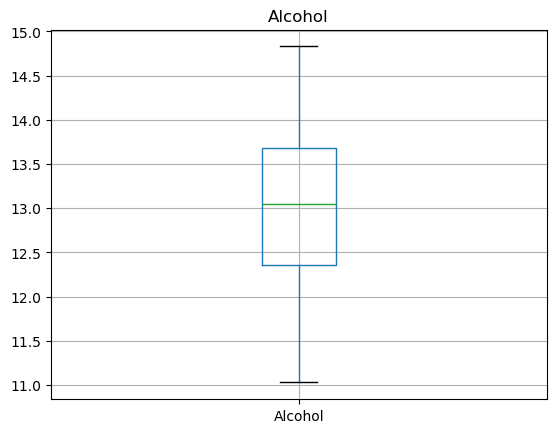

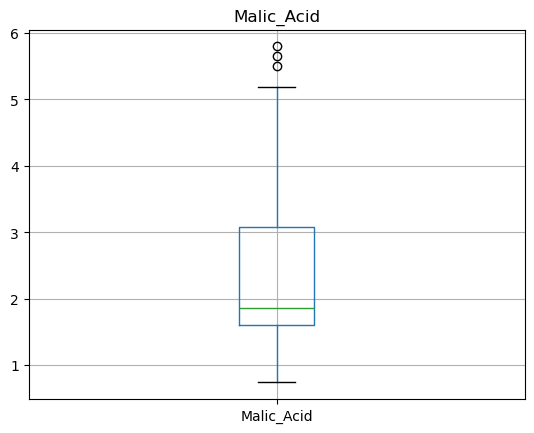

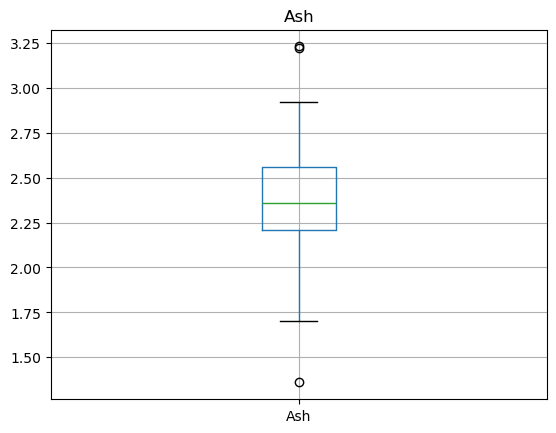

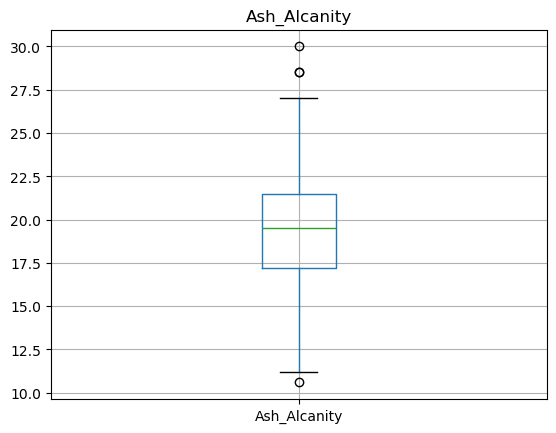

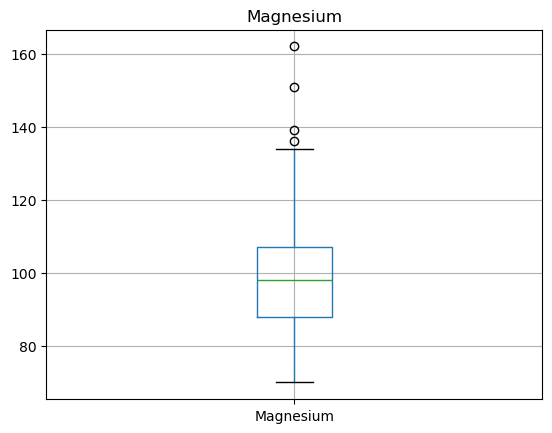

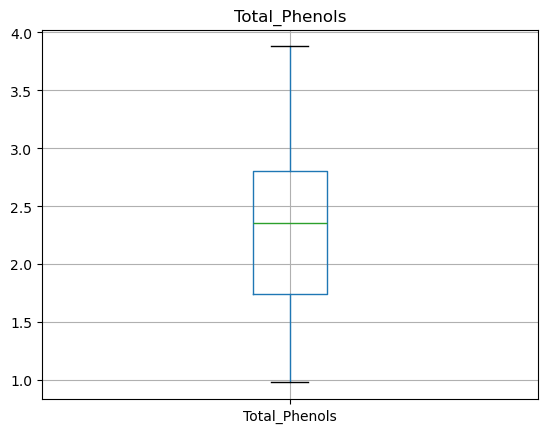

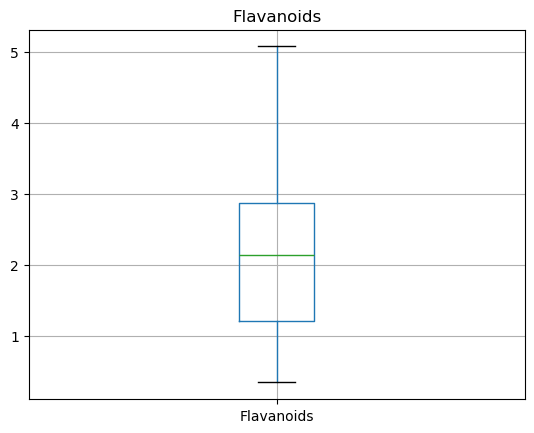

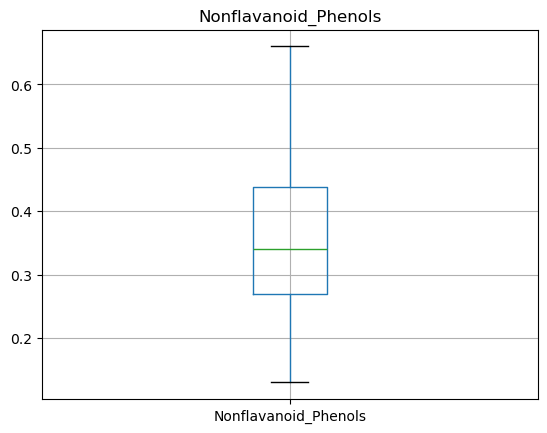

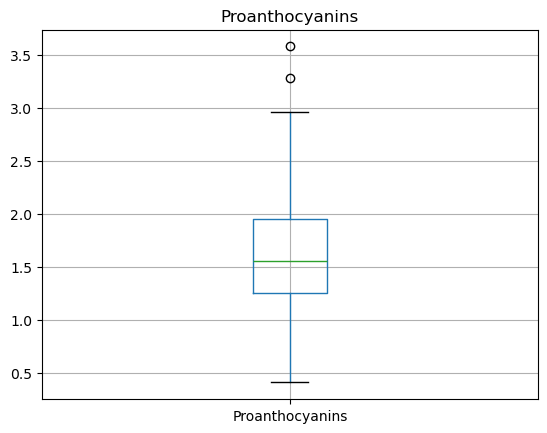

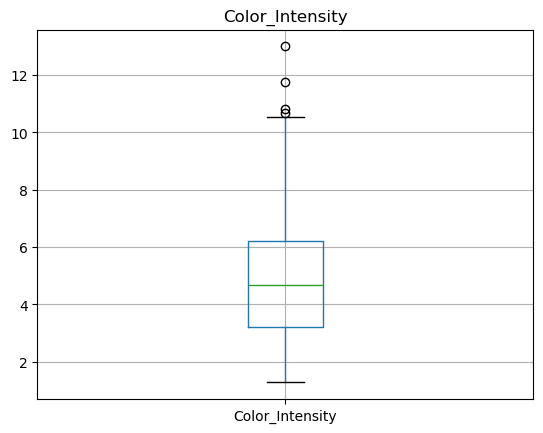

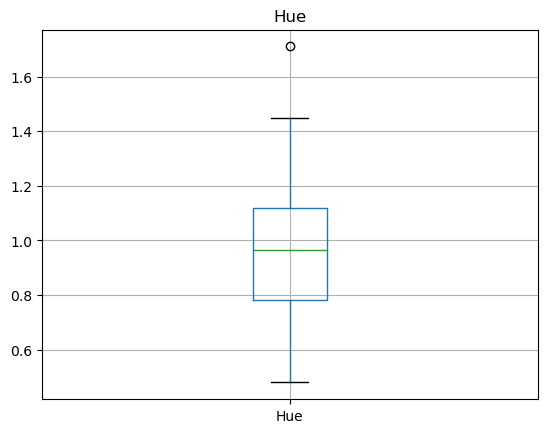

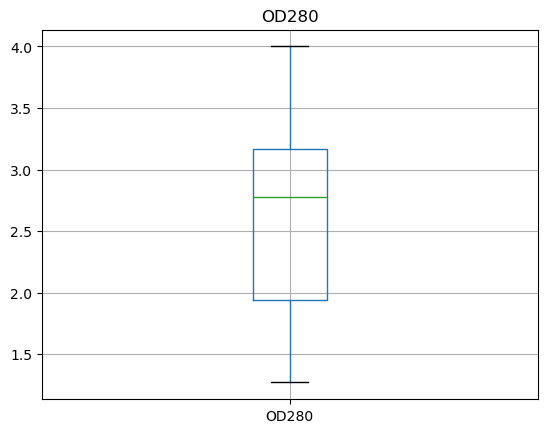

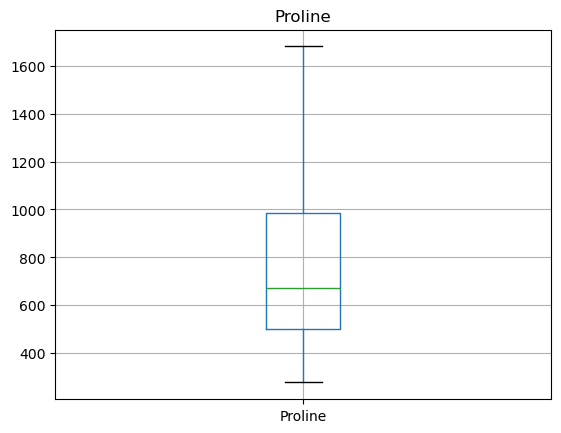

In [13]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()

In [15]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)

        # To find IQR
        iqr = Q3 - Q1

        # To find lower bound and upper bound
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        # Capping the outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))

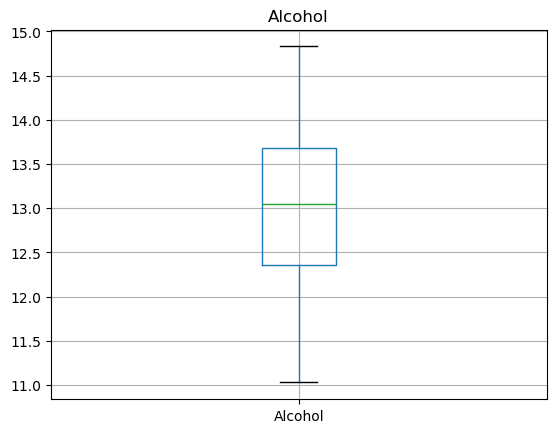

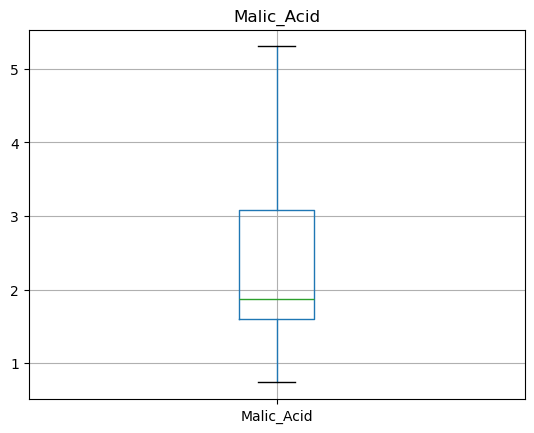

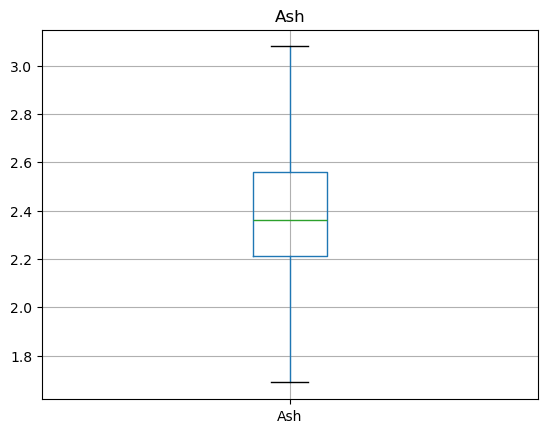

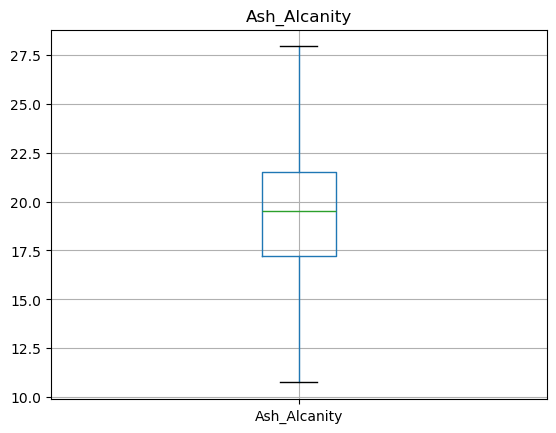

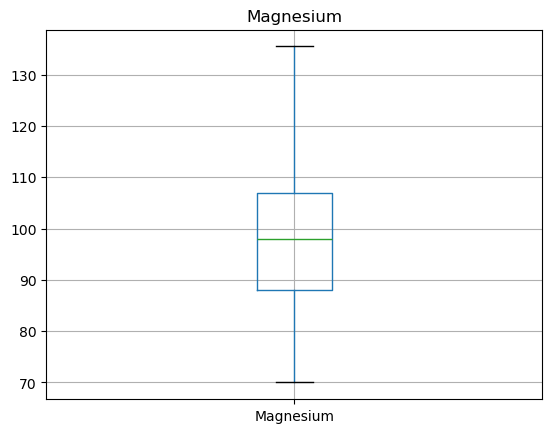

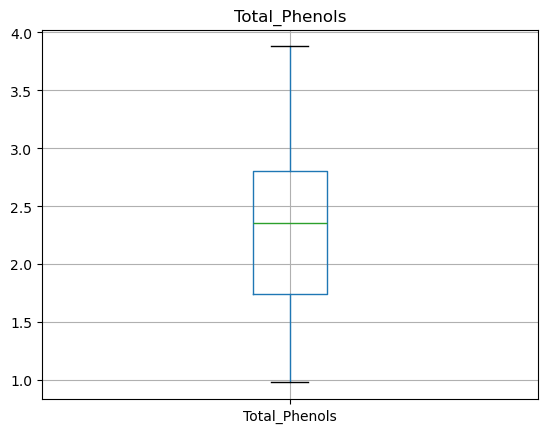

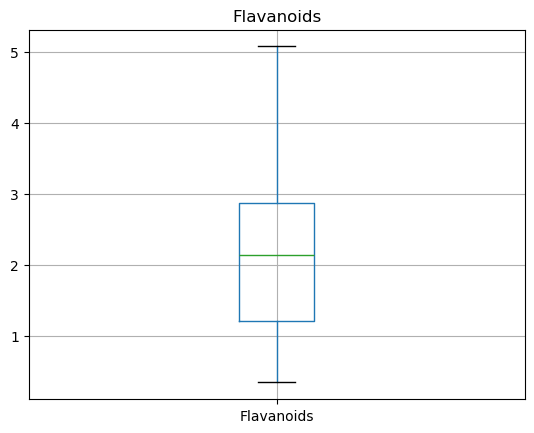

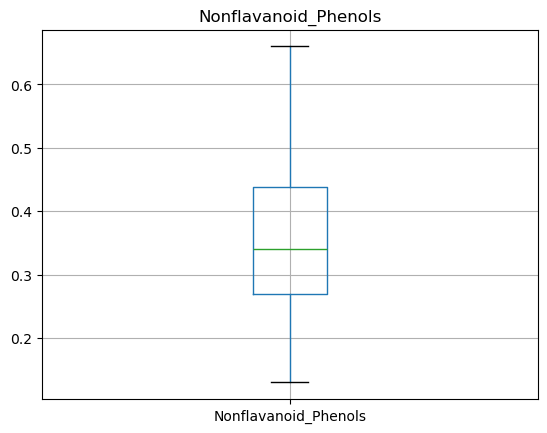

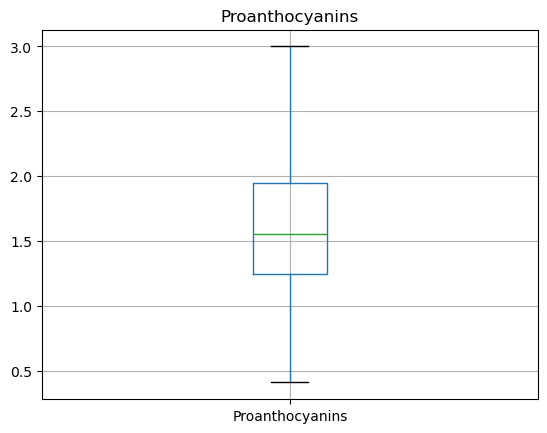

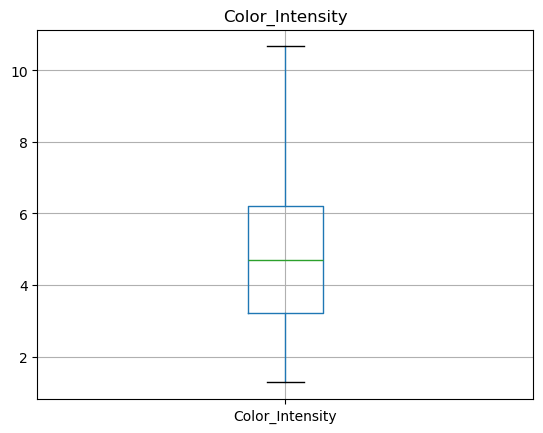

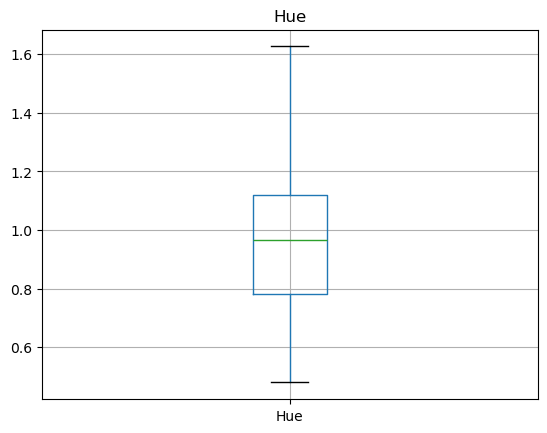

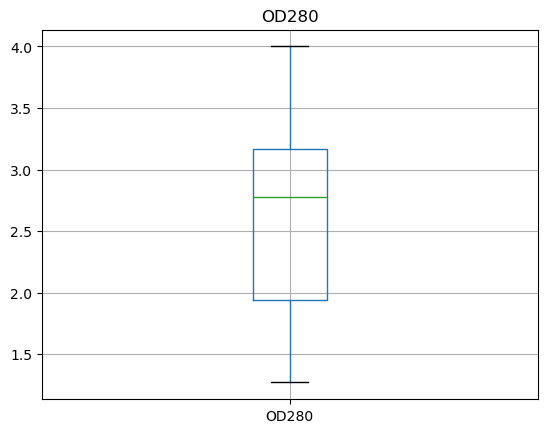

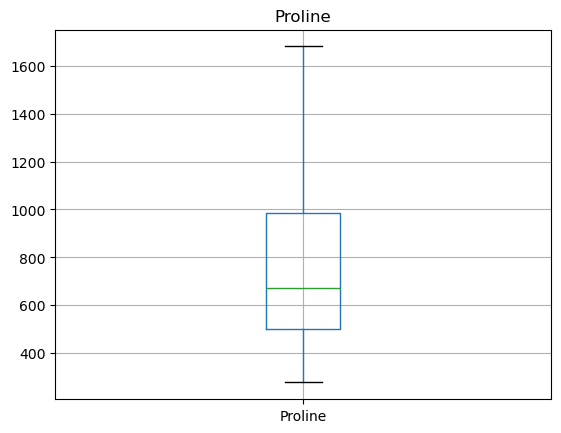

In [17]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

In [19]:

X = df[['Alcohol','Color_Intensity']]

In [21]:
# Assuming df is your original DataFrame with numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()  # Display the first few rows of the scaled DataFrame

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.51861,-0.56553,0.24064,-1.18288,2.05711,0.80900,1.03482,-0.65956,1.26474,0.26695,0.36661,1.84792,1.01301
1,0.24629,-0.50173,-0.86218,-2.52496,0.03864,0.56865,0.73363,-0.82072,-0.54990,-0.29192,0.41077,1.11345,0.96524
2,0.19688,0.02695,1.15332,-0.26783,0.11340,0.80900,1.21553,-0.49841,2.19901,0.28470,0.32245,0.78859,1.39515
3,1.69155,-0.34677,0.50684,-0.81686,1.01050,2.49145,1.46652,-0.98188,1.06711,1.22503,-0.42825,1.18407,2.33457
4,0.29570,0.23660,1.91388,0.46421,1.38429,0.80900,0.66335,0.22680,0.42030,-0.31854,0.36661,0.44960,-0.03787


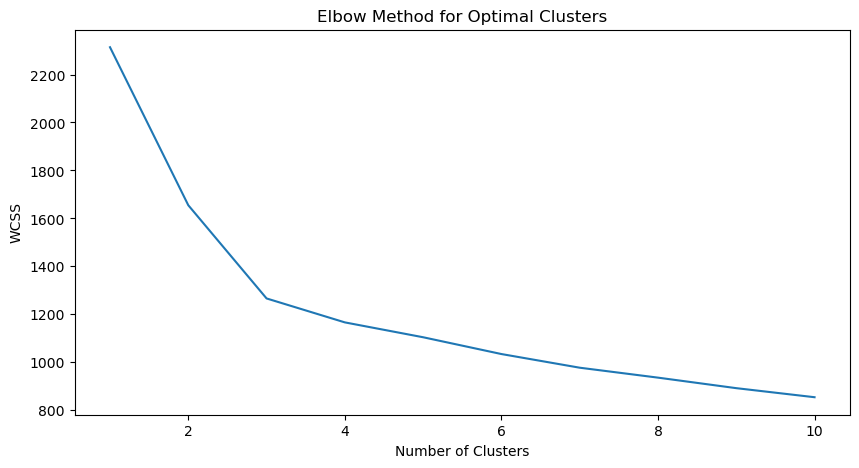

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
x = scaler.fit_transform(df)

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

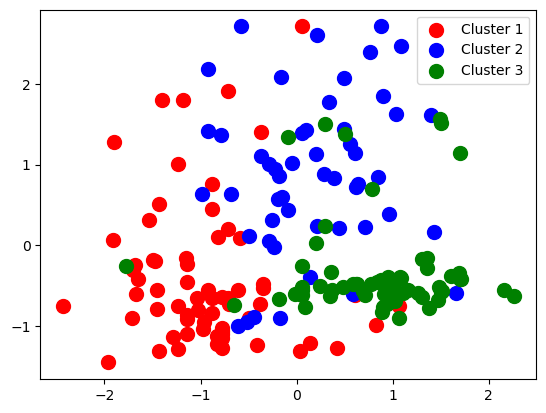

In [29]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label='Cluster 3')

plt.legend()
plt.show()

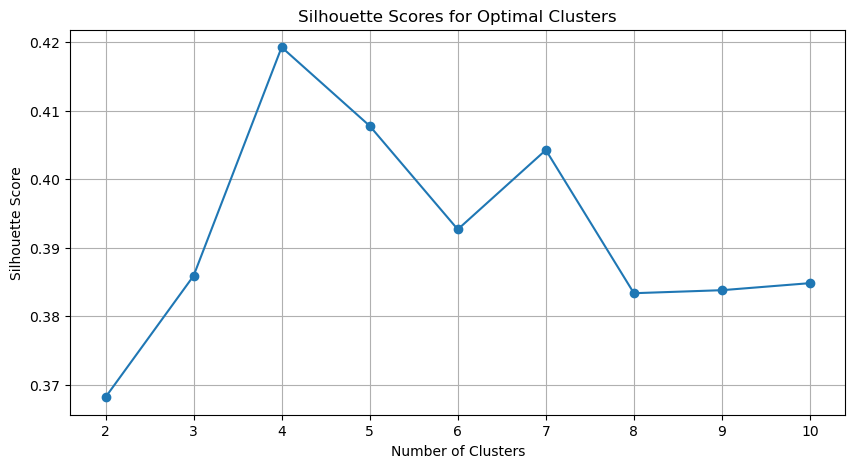

The highest silhouette score is 0.4193 for 4 clusters.


In [31]:
np.random.seed(0)
df_scaled = np.random.rand(200, 2)  # Replace with your actual scaled feature data

# List to hold silhouette scores
silhouette_scores = []
num_clusters_range = range(2, 11)  # Range of cluster numbers to try

for i in num_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

# Finding and printing the highest silhouette score
max_score = max(silhouette_scores)
best_num_clusters = num_clusters_range[silhouette_scores.index(max_score)]

print(f"The highest silhouette score is {max_score:.4f} for {best_num_clusters} clusters.")

In [33]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_pred)
score

0.26820373514271345

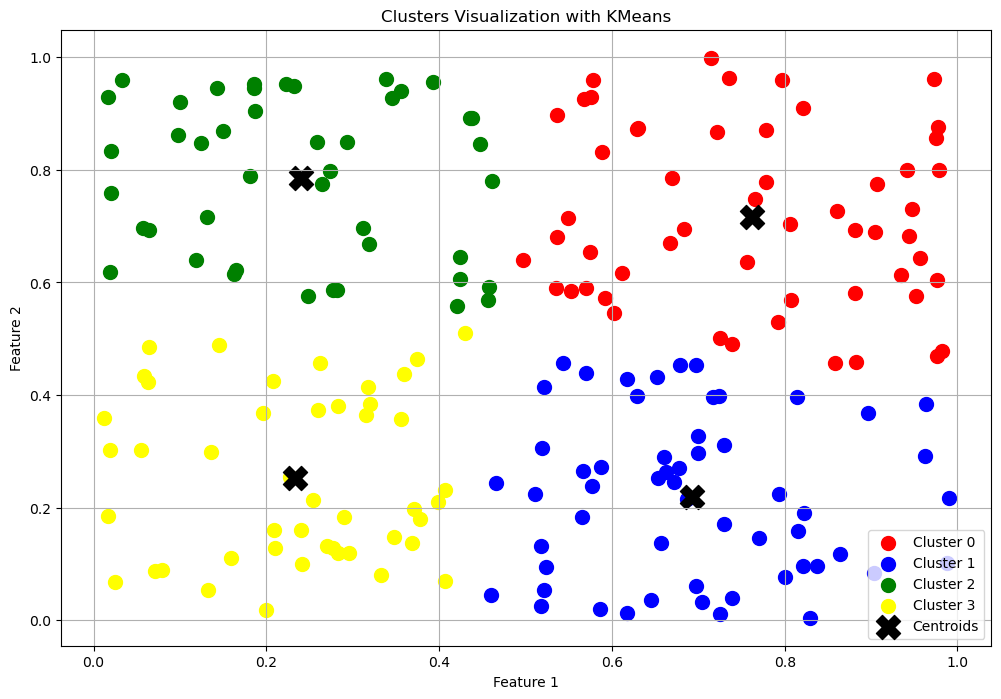

In [35]:
# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'yellow']  # Define colors for 4 clusters

# Plot each cluster with a different color
for i in range(optimal_clusters):
    plt.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', label='Centroids', marker='X')
plt.title('Clusters Visualization with KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
optimal_clusters = 4  # Choose based on elbow or silhouette
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

kmeans_labels

array([0, 0, 2, 2, 1, 0, 0, 3, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 3, 1,
       0, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 0, 0, 1, 3, 3, 3, 2, 1, 1,
       0, 2, 2, 3, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 3, 1, 1,
       3, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 3, 1, 0, 0, 3, 1, 1, 3, 1,
       2, 1, 2, 1, 0, 0, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 0, 1, 1, 2, 3, 0,
       0, 2, 2, 1, 0, 3, 1, 3, 3, 2, 1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 3, 2,
       0, 2, 3, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 3, 1, 1, 2, 0, 0, 3, 3, 3,
       1, 1, 3, 1, 2, 0, 3, 3, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 1, 1, 0, 1,
       3, 0, 3, 2, 2, 1, 0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 3, 2, 2,
       3, 3])

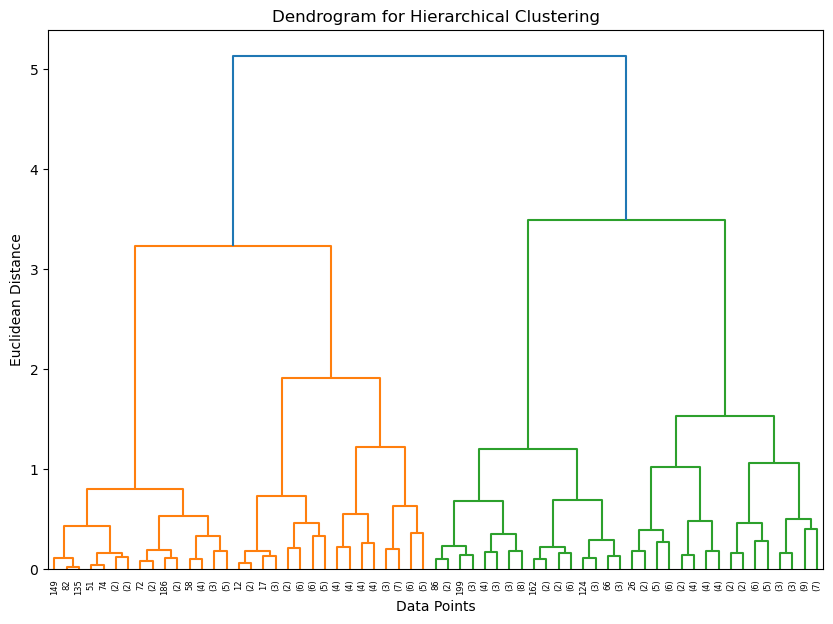

In [39]:
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [41]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(x)
print(y_pred) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [43]:
optimal_clusters = 2  # Choose based on dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(df_scaled)
print(agg_labels)

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0]


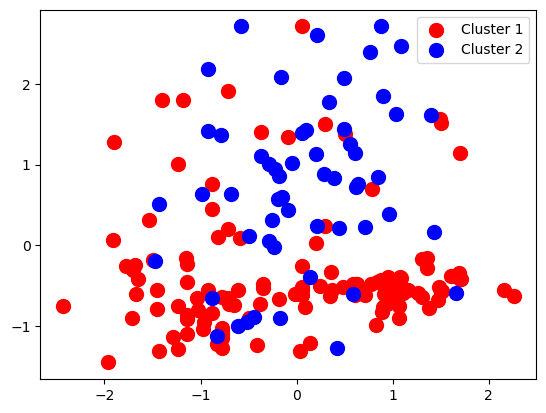

In [45]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')


plt.legend()
plt.show()

In [47]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [49]:
# Since DBSCAN may classify some points as noise (-1), we'll filter those out for silhouette score calculation
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
else:
    print('DBSCAN resulted in a single cluster or no valid clusters.')

DBSCAN resulted in a single cluster or no valid clusters.


In [52]:
df['cluster_labels'] = model.fit_predict(df)


NameError: name 'model' is not defined

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assuming 'cluster_labels' is the target column obtained from clustering
X = df.drop(columns=['cluster_labels'])  # Features (excluding cluster labels)
y = df['cluster_labels']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict cluster labels
y_pred = clf.predict(X_test)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


KeyError: "['cluster_labels'] not found in axis"


## Insights & Conclusion

- The dataset was analyzed, preprocessed, and clustered using multiple algorithms (K-Means, DBSCAN, Agglomerative Clustering).
- Dimensionality reduction (PCA) was applied to optimize clustering.
- The best clustering approach was selected based on the silhouette score.
- A supervised learning model (RandomForest) was trained to predict cluster labels.
- The model performance was evaluated using precision, recall, and F1-score.

### Key Findings:
1. Clusters were successfully formed based on wine chemical compositions.
2. The classification model achieved a good performance in predicting clusters.
3. The insights gained can help categorize wines more efficiently.

Future improvements can include testing additional classification models and feature engineering.
